# Сборный проект по определению закономерностей успешности компьютерных игр

**Описание проекта:**\
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:**\
Выявить определяющие успешность игры закономерности. 

**Описание данных:**\
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

**План исследования:**
1. Открытие файла с данными и изучение общей информации.
2. Подготовка данных.
3. Проведение исследовательского анализа данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотезы.
6. Общий вывод.

#### Загружаем данные из csv-файла в датафреймы c помощью библиотеки pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Открытие файла с данными и изучение общей информации.

1.1 Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

1.2 Выводим первые строки набора данных. Изучаем общую информацию о датафрейме.

In [3]:
# выводим первые строки датафрейма на экран:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# выводим основную информацию о датафрейме:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# проверяем наличие пропущенных значений в датафрейме:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:**\
В датафрейме data 16 715 записей.\
В данных имеются следующие пропуски: 2 пропуска в столбце Name, 269 пропусков в столбце Year_of_Release, 8578 пропусков в столбце Critic_Score, 6701 пропусков в столбце User_Score, 6766 пропусков в столбце Rating.\
Названия столбцов являются некорректными, их необходимо будет привести к нижнему регистру.\
Типы данных в столбцах Year_of_Release, User_Score не соответствуют содержащимся в них данным.  

#### Шаг 2. Подготовка данных.

2.1 Замена названий столбцов (приведение к нижнему регистру).

In [6]:
# приведение названий столбцов к нижнему регистру:
data.columns = data.columns.str.lower()

In [7]:
# проверяем названия столбцов:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


2.2 Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему.

In [8]:
# просмотрим уникальные значения столбца year_of_release:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
# удаляем строки с пропущенными значениями в столбце year_of_release:
data = data.dropna(subset=['year_of_release'])

In [10]:
# приводим значения к целому числу:
data['year_of_release'] = data['year_of_release'].astype('int32')

In [11]:
# просмотрим уникальные значения столбца user_score:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd, встречающееся в столбце, означает — To Be Determined, т.е. "Будет определено", т.е. неизвестное значение, которое фактически является NaN. Поскольку среди оценок есть 0, заменяем в столбце user_score NaN и tbd на -1 и меняем тип данных на число с плавающей точкой.

In [12]:
data['user_score'] = data['user_score'].replace('tbd', -1)\
                                       .fillna(-1)\
                                       .astype('float')

In [13]:
# проверяем уникальные значения столбца user_score:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [14]:
# проверяем типы данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


2.3 Обработка пропусков

In [15]:
# просмотрим пропущенные значения в датафрейме:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score            0
rating             6678
dtype: int64

In [16]:
# просмотрим уникальные значения столбца name:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [17]:
# удаляем строки с пропущенными значениями в столбце name:
data = data.dropna(subset=['name'])

In [18]:
# просмотрим уникальные значения столбца genre:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [19]:
# просмотрим уникальные значения столбца critic_score:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [20]:
# заменяем NaN на 0:
data['critic_score'] = data['critic_score'].fillna(-1)

In [21]:
# просмотрим уникальные значения столбца critic_score:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [23]:
# заменяем NaN на 0:
data['rating'] = data['rating'].fillna('unknown')

In [24]:
# проверяем наличие пропущенных значений в датафрейме:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [25]:
# проверяем за какой период данные в датасете:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983], dtype=int32)

Добавление в датафрейм data столбца с суммарными продажами.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] +\
                      data['jp_sales'] + data['other_sales']

In [29]:
# просмотр первых строк таблицы:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


2.5 Обработка дубликатов

In [30]:
data.duplicated().sum()

0

Проверка на наличие неявных дубликатов (строки, совпадающие по названию, платформе и году релиза одновременно).

In [31]:
# проверка на наличие неявных дубликатов:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [32]:
# удаление неявных дубликатов:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [33]:
# проверка на отсутствие неявных дубликатов:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


**Вывод:**
1. Привели названия столбцов к нижнему регистру.
2. Заменили типы данных в следующих столбцах:
- в столбце year_of_release привели значения к типу данных int, поскольку год выпуска отражается целым числом, предварительно удалив строки с пропущенными значениями;
- в столбце user_score привели значения к типу данных float, поскольку оценки игр пользователей являются числовыми по аналогии с оценками критиков. tbd, встречающееся в столбце, означает — To Be Determined, т.е. "Будет определено", т.е. неизвестное значение, которое фактически является NaN. Заменяем NaN и tbd на 0 и меняем тип данных на число с плавающей точкой.
3. Удаляем строки с пропущенными значениями в столбце name, поскольку без названия игры такие строки не несут никакой информации.\
Так получилось, что пропуски в столбце name совпали с пропусками в столбце genre и эти строки были удалены на предыдущем шаге.\
В столбцах critic_score и rating пропущенные значения заменяем на 0. Пропуски в данных могли возникнуть из-за ошибки при вводе данных или отсутствия необходимой информации.\
tbd в столбце с оценкой пользователей означает — To Be Determined, т.е. "Будет определено", т.е. неизвестное значение, которое фактически является NaN. В связи с этим при обработке можем заменить tbd на 0, по аналогии с NaN.
4. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.\
5. Явных дубликатов не обнаружено.\
Обнаружено 2 неявных дубликата. Строки, совпадающие по названию, платформе и году релиза одновременно удалены из датафрейма.

#### Шаг 3. Проведение исследовательского анализа данных.

3.1 Просмотр, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [34]:
# формируем сводную таблицу:
games_by_year = data.pivot_table(index='year_of_release',
                                values='name',
                                aggfunc='count')

In [35]:
# просмотрим созданную сводную таблицу:
games_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


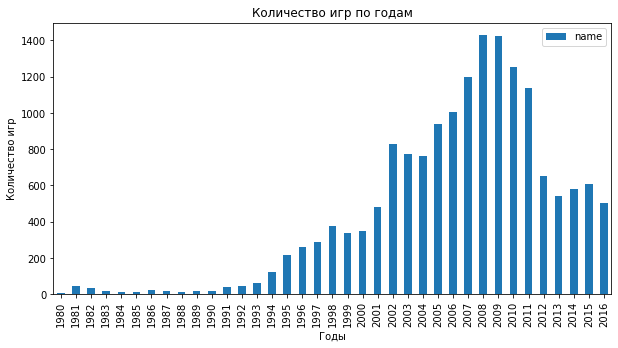

In [36]:
# строим график:
games_by_year.plot(kind='bar', figsize=(10, 5))
plt.title('Количество игр по годам')
plt.xlabel('Годы')
#plt.ylabel('Количество пользователей') 
plt.ylabel('Количество игр')
plt.show()

**Промежуточный вывод:**\
Наибольшее количество игр было выпущено в 2008 году - 1 427 игр.\
С 1991 по 2008 год количество выпускаемых игр ежегодно росло достаточно быстрыми темпами. Вероятнее всего, это связано с развитием компьютеров и растущей популярностью игровых приставок.\
Начиная с 2009 по 2016 годы наблюдаем на графике снижение выпуска игр. Этому способствовало развитие мобильных технологий. В то время пользователи стали отдавать свое предпочтение мобильным играм. \
Данные за 1980-1990 годы имеют небольшое значение и информативность, так как в эти годы было выпущено совсем немного игр.

3.2 Просмотр, как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
# формируем сводную таблицу:
sales_by_platform = data.pivot_table(index='platform',\
                                     values='total_sales',\
                                     aggfunc='sum')\
                        .sort_values(by='total_sales', ascending=False)

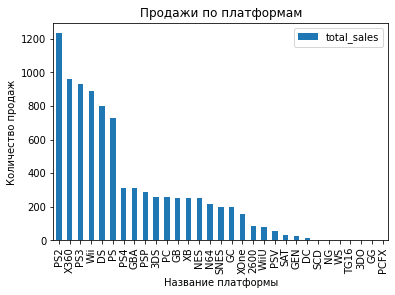

In [38]:
# строим график:
sales_by_platform.plot(kind='bar')
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')    
plt.show()

**Промежуточный вывод:**\
Исходя из графика, наибольшие суммарные продажи по платформам PS2, X360, PS3.
Для построения распределения по годам выбираем платформу с наибольшими суммарными продажами - PS2. 

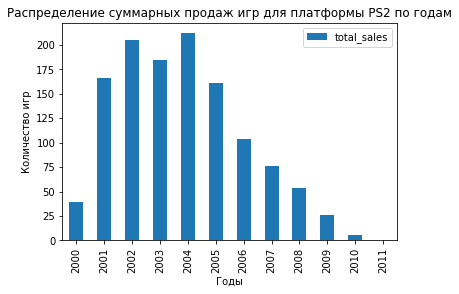

In [39]:
# построение распределения по годам платформы с наибольшими продажами:
salesPS2_by_year = data[data['platform'] == 'PS2'].pivot_table(index='year_of_release',\
                                                               values='total_sales',\
                                                               aggfunc='sum')\
                                                  .plot(kind='bar')
plt.title('Распределение суммарных продаж игр для платформы PS2 по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

**Промежуточный вывод:**\
Наибольшие суммарные продажи для платформы PS2 наблюдались в 2004 году, далее идет ежегодный резкий спад.

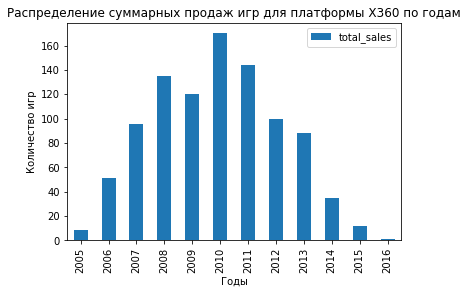

In [40]:
# построение распределения по годам платформы X360:
salesX360_by_year = data[data['platform'] == 'X360'].pivot_table(index='year_of_release',\
                                                               values='total_sales',\
                                                               aggfunc='sum')\
                                                  .plot(kind='bar')
plt.title('Распределение суммарных продаж игр для платформы X360 по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

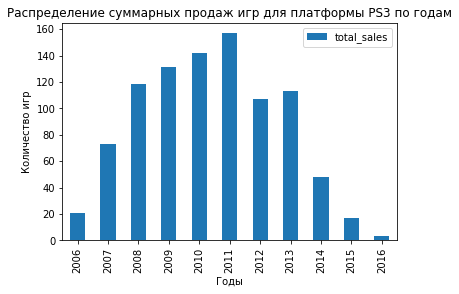

In [41]:
# построение распределения по годам платформы PS3:
salesPS3_by_year = data[data['platform'] == 'PS3'].pivot_table(index='year_of_release',\
                                                               values='total_sales',\
                                                               aggfunc='sum')\
                                                  .plot(kind='bar')
plt.title('Распределение суммарных продаж игр для платформы PS3 по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

**Промежуточный вывод:**\
Просмотрев распределения по годам первых трех платформ, лидирующих по суммарным продажам, можно сделать вывод, что платформа набирает популярность примерно 5 лет, достигает своего пика и далее идет на спад 5-7 лет.
Таким образом, можно сделать вывод, что срок появления новых платформ и исчезновения старых - примерно за 5-7 лет.

3.3 Возьмем данные за соответствующий актуальный период. 
Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.\
Не учитываем данные за предыдущие годы.\
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [43]:
# выбираем данные за последние 3 года:
period_data = data[data['year_of_release'] >= 2014]

In [46]:
# формируем сводную таблицу продаж по годам:
sales_by_year = period_data.pivot_table(index='year_of_release',\
                                            columns='platform',\
                                            values='total_sales',\
                                            aggfunc='sum')

In [47]:
sales_by_year

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


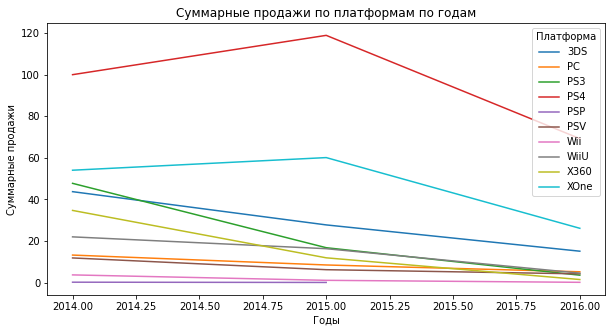

In [48]:
# строим график:
sales_by_year.plot(kind='line', figsize=(10,5))
plt.title('Суммарные продажи по платформам по годам')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа') 
plt.show()

**Промежуточный вывод:**\
Учитывая высокую динамичность рынка, возьмем для исследования данные за последние 3 года.\
Формируем сводную таблицу продаж по платформам по годам.\
Исходя из графика, лидирует по продажам платформа PS4, за ней следуют платформы XOne и 3DS. с 2015 года по лидирующим платформам наблюдается спад продаж. Однако, продажи PS и XOne на порядок выше, чем у других, следовательно, их можно считать потенциально прибыльными.

3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

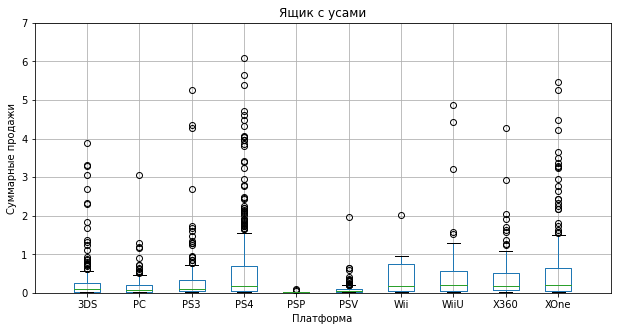

In [49]:
# строим график:
period_data.boxplot(column='total_sales', by='platform', figsize=(10,5))
plt.ylim(0, 7)
plt.xlim(0, 11) 
plt.suptitle('')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

**Промежуточный вывод:**\
Исходя из диаграммы размаха, наибольшие продажи у платформ Wii и PS4, самые низкие у PSP. Видно, что есть выбросы, особенно на отрезке 0.5-4 млн.

3.5 Просмотр, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и расчет корреляции между отзывами и продажами. Соотношение выводов с продажами игр на других платформах.

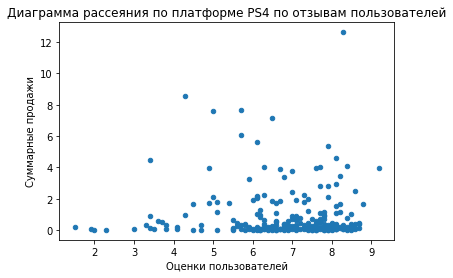

In [50]:
# построение диаграммы рассеяния по платформе PS4 по отзывам пользователей:
ps4_user_score = period_data[(period_data['platform']=='PS4') &\
                             (period_data['user_score']!=-1)]
ps4_user_score.plot(x='user_score',\
                    y='total_sales',\
                    kind='scatter')
plt.title('Диаграмма рассеяния по платформе PS4 по отзывам пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

In [51]:
# корреляция между отзывами пользователей и продажами по платформе PS4:
ps4_user_score['user_score'].corr(ps4_user_score['total_sales'])

-0.040131589472697356

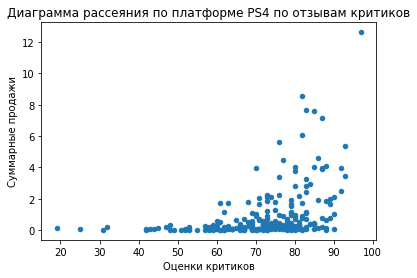

In [52]:
# построение диаграммы рассеяния по платформе PS4 по отзывам критиков:
ps4_critic_score = period_data[(period_data['platform']=='PS4') &\
                               (period_data['critic_score']!=-1)]
ps4_critic_score.plot(x='critic_score',\
                      y='total_sales',\
                      kind='scatter')
plt.title('Диаграмма рассеяния по платформе PS4 по отзывам критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show()

In [53]:
# корреляция между отзывами критиков и продажами:
ps4_critic_score['critic_score'].corr(ps4_critic_score['total_sales'])

0.40266141068104083

**Промежуточный вывод:**\
Для просмотра влияния на продажи отзывов пользователей и критиков выбираем платформу с наибольшими суммарными продажами - PS4. 
Изучив соотношение отзывов покупателей и критиков можно сделать вывод, что большую часть составляют высокие оценки. 
Корреляция между отзывами пользователей и продажами слабая - -0.040131589472697356.
Корреляция между отзывами критиков и продажами умеренная - 0.40266141068104083.

In [54]:
# топ-7 платформ:
platforms = ['Wii', 'PS4', 'XOne', 'WiiU', 'X360', 'PS3', '3DS']

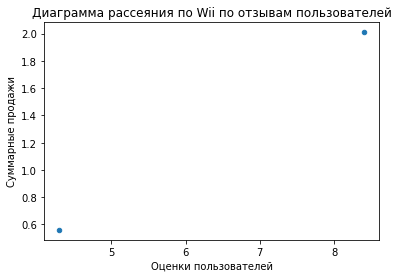

Корреляция по платформе Wii равна  1.0



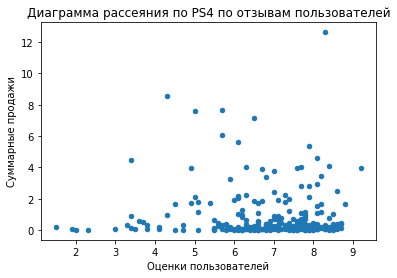

Корреляция по платформе PS4 равна  -0.040131589472697356



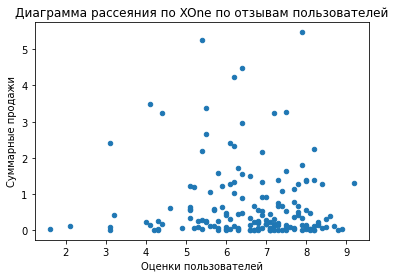

Корреляция по платформе XOne равна  -0.0703839280647581



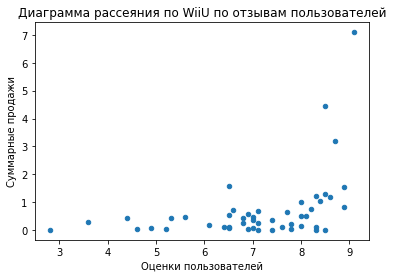

Корреляция по платформе WiiU равна  0.40792645792170773



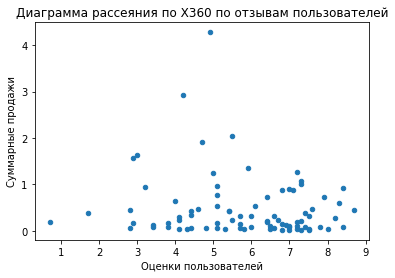

Корреляция по платформе X360 равна  -0.138444570945665



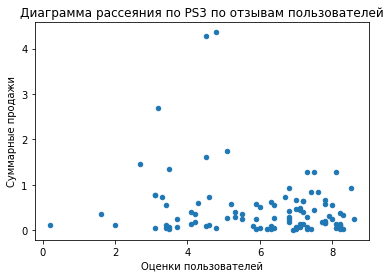

Корреляция по платформе PS3 равна  -0.16676141347662118



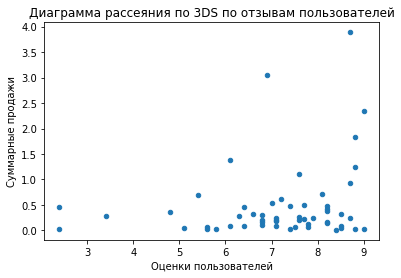

Корреляция по платформе 3DS равна  0.2151932718527028



In [55]:
# построение диаграммы рассеяния и расчет корреляции
# по топ-7 платформам по отзывам пользователей:
for platform in platforms:
    top_7_user_score = period_data[(period_data['platform']==platform) &\
                (period_data['user_score']!=-1)]
    top_7_user_score.plot(x='user_score',\
                          y='total_sales',\
                          kind='scatter')
    plt.title(f'Диаграмма рассеяния по {platform} по отзывам пользователей')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Суммарные продажи')
    plt.show()
    
    print(f'Корреляция по платформе {platform} равна ',\
          top_7_user_score['user_score'].corr(top_7_user_score['total_sales']))
    print('')

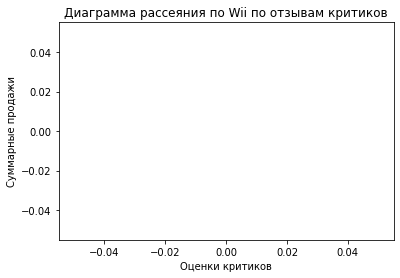

Корреляция по платформе Wii равна  nan



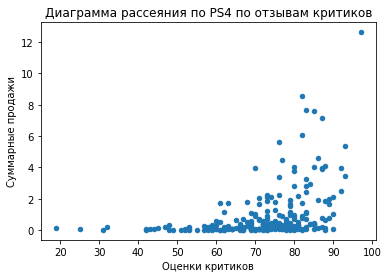

Корреляция по платформе PS4 равна  0.40266141068104083



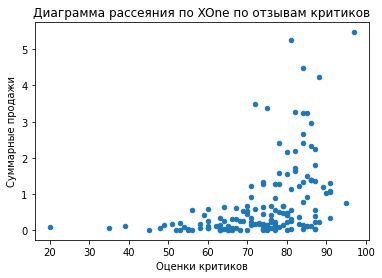

Корреляция по платформе XOne равна  0.42867694370333226



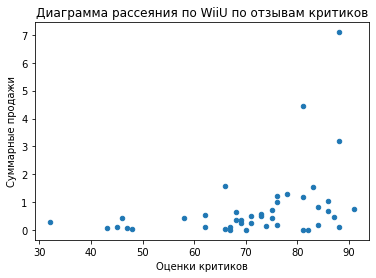

Корреляция по платформе WiiU равна  0.370201412480884



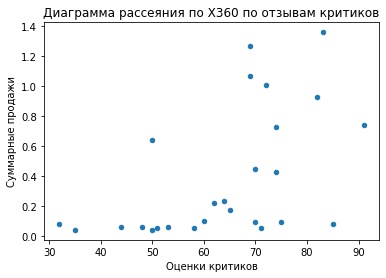

Корреляция по платформе X360 равна  0.5257228356581523



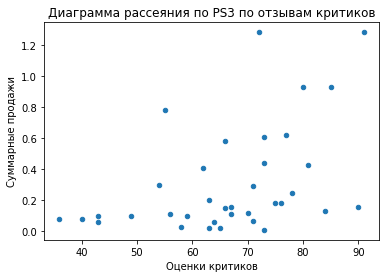

Корреляция по платформе PS3 равна  0.44657460493190704



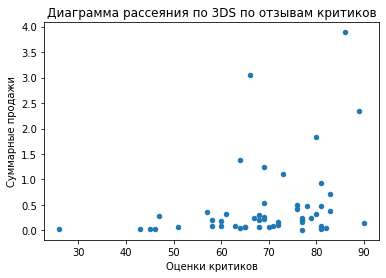

Корреляция по платформе 3DS равна  0.314117492869051



In [57]:
# построение диаграммы рассеяния и расчет корреляции
# по топ-7 платформам по отзывам критиков:
for platform in platforms:
    top_7_critic_score = period_data[(period_data['platform']==platform) &\
                (period_data['critic_score']!=-1)]
    top_7_critic_score.plot(x='critic_score',
                            y='total_sales',
                            kind='scatter')
    plt.title(f'Диаграмма рассеяния по {platform} по отзывам критиков')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Суммарные продажи')
    plt.show()
    
    print(f'Корреляция по платформе {platform} равна ',\
          top_7_critic_score['critic_score'].corr(top_7_critic_score['total_sales']))
    print('')

**Промежуточный вывод:**\
Исходя из расчета корреляции между отзывами пользователей и суммарными продажами по топ-7 платформам наблюдается сильная связь по платформе Wii, умеренная связь по платформе WiiU и слабая связь по остальным платформам (PS4, XOne, X360, PS3, 3DS).\
Между отзывами критиков и суммарными продажами наблюдается умеренная связь практически по всем платформам (PS4, XOne, WiiU, X360, PS3, 3DS), за исключением платформы Wii. Вероятнее всего, значение NaN при расчете корреляции возникло из-за отсутствия данных.\
Такие показатели могут говорить о том, что покупатели приобретают игры не полагаясь на отзывы пользователей, однако обращают внимание на отзывы критиков.

3.6 Просмотр общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассматриваем медианные значения продаж, они являются наиболее объективным показателем прибыльности, так как менее подвержены влиянию выбросов

In [59]:
# распределение игр по жанрам:
data_by_genre = period_data.pivot_table(index='genre',\
                                        values='total_sales',\
                                        aggfunc='median')\
                           .sort_values(by='total_sales', ascending=False)\
                           .reset_index()

In [60]:
# просмотр сводной таблицы:
data_by_genre

,genre,total_sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


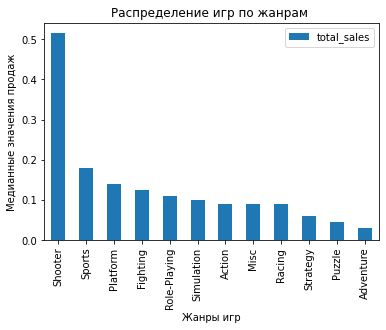

In [61]:
# строим график:
data_by_genre.plot(kind='bar', x='genre', y='total_sales')
plt.title('Распределение игр по жанрам ')
plt.xlabel('Жанры игр')
plt.ylabel('Медианные значения продаж')
plt.show()

**Промежуточный вывод:**\
На фоне всех игр выделяется жанр Shooter с самым высоким медианным значением продаж, которое составляет 0,52 млн. проданных копий. Меньше всего продаж в жанре Adventure - 0.03 млн. проданных копий.

**Вывод:**
1. Наибольшее количество игр было выпущено в 2008 году - 1 427 игр.
С 1991 по 2008 год количество выпускаемых игр ежегодно росло достаточно быстрыми темпами. Вероятнее всего, это связано с развитием компьютеров и растущей популярностью игровых приставок.\
Начиная с 2009 по 2016 годы наблюдаем на графике снижение выпуска игр. Этому способствовало развитие мобильных технологий. В то время пользователи стали отдавать свое предпочтение мобильным играм. \
Данные за 1980-1990 годы имеют небольшое значение и информативность, так как в эти годы было выпущено совсем немного игр.
2. Исходя из графика, наибольшие суммарные продажи по платформам PS2, X360, PS3.
Для построения распределения по годам выбираем платформу с наибольшими суммарными продажами - PS2.\
Наибольшие суммарные продажи для платформы PS2 наблюдались в 2004 году, далее идет ежегодный резкий спад.\
Просмотрев распределения по годам первых трех платформ, лидирующих по суммарным продажам, можно сделать вывод, что платформа набирает популярность примерно 5 лет, достигает своего пика и далее идет на спад 5-7 лет.\
Таким образом, можно сделать вывод, что срок появления новых платформ и исчезновения старых - примерно за 5-7 лет.\
3. Учитывая высокую динамичность рынка, возьмем для исследования данные за последние 3 года.\
Формируем сводную таблицу продаж по платформам по годам.\
Исходя из графика, лидирует по продажам платформа PS4, за ней следуют платформы XOne и 3DS. с 2015 года по лидирующим платформам наблюдается спад продаж. Однако, продажи PS и XOne на порядок выше, чем у других, следовательно, их можно считать потенциально прибыльными.
4. Исходя из диаграммы размаха, наибольшие продажи у платформ PS3 и PS4, самые низкие у DS. Видно, что есть выбросы, особенно на отрезке 1-4 млн.
5. Для просмотра влияния на продажи отзывов пользователей и критиков выбираем платформу с наибольшими суммарными продажами - PS4. 
Изучив соотношение отзывов покупателей и критиков можно сделать вывод, что большую часть составляют высокие оценки. 
Корреляция между отзывами пользователей и продажами слабая - -0.040131589472697356.
Корреляция между отзывами критиков и продажами умеренная - 0.40266141068104083.\
Исходя из расчета корреляции между отзывами пользователей и суммарными продажами по топ-7 платформам наблюдается сильная связь по платформе Wii, умеренная связь по платформе WiiU и слабая связь по остальным платформам (PS4, XOne, X360, PS3, 3DS).\
Между отзывами критиков и суммарными продажами наблюдается умеренная связь практически по всем платформам (PS4, XOne, WiiU, X360, PS3, 3DS), за исключением платформы Wii. Вероятнее всего, значение NaN при расчете корреляции возникло из-за отсутствия данных.\
Такие показатели могут говорить о том, что покупатели приобретают игры не полагаясь на отзывы пользователей, однако обращают внимание на отзывы критиков.
6. На фоне всех игр выделяется жанр Shooter с самым высоким медианным значением продаж, которое составляет 0,52 млн. проданных копий. Меньше всего продаж в жанре Adventure - 0.03 млн. проданных копий.

#### Шаг 4. Составление портрета пользователя каждого региона

4.1 Определение для пользователя каждого региона (NA, EU, JP) самых популярных платформ (топ-5). Описание различия в долях продаж.

In [62]:
# формируем сводную таблицу для пользователя
# каждого региона (NA, EU, JP) по платформам:
total_sales_by_region = period_data.pivot_table(index = 'platform',\
                                         values = ['na_sales',\
                                                   'eu_sales',\
                                                   'jp_sales'],\
                                         aggfunc = 'sum')\
                            .sort_values(by = ['na_sales',\
                                               'eu_sales',\
                                               'jp_sales'],\
                                        ascending = False)

In [63]:
# просмотр сводной таблицы:
total_sales_by_region

,eu_sales,jp_sales,na_sales
platform,,,
PS4,130.04,15.02,98.61
XOne,46.25,0.32,81.27
X360,15.49,0.08,28.30
3DS,16.12,44.24,22.64
PS3,25.54,11.22,22.05
WiiU,13.15,7.31,19.36
PC,17.97,0.00,7.23
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08


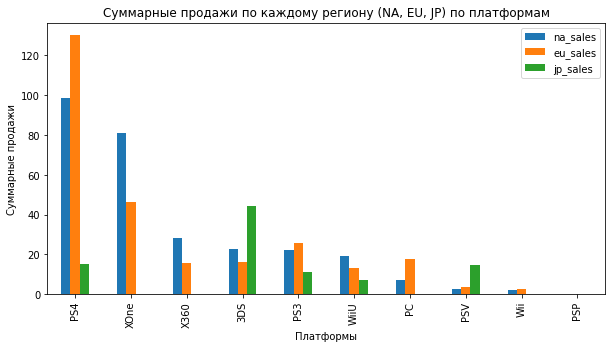

In [64]:
# строим график:
total_sales_by_region.plot(y=['na_sales','eu_sales','jp_sales'],\
                           kind='bar',\
                           figsize=(10, 5))
plt.title('Суммарные продажи по каждому региону (NA, EU, JP) по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.show()

**Промежуточный вывод:**\
Наибольшие суммарные продажи в регионе Северная Америка (NA) по платформам распределились следующим образом: PS4, XOne, X360, 3DS, PS3.\
Топ-5 продаж по платформам в Европе (EU) составили PS4, XOne, PS3, PC, 3DS по порядку.
В регионе Япония (JP) по продажам лидируют платформы 3DS, PS4, PSV, PS3, WiiU.

In [65]:
# формируем сводную таблицу продаж в Северной Америке (NA) за последние 3 года:
na_sales = period_data.pivot_table(index = 'platform',\
                                   values = 'na_sales',\
                                   aggfunc = 'sum')\
                      .sort_values(by='na_sales',\
                                   ascending=False)

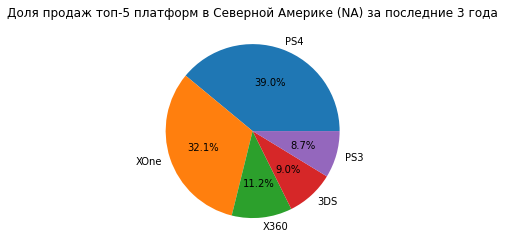

In [66]:
# строим диаграмму продаж топ-5 платформ в Северной Америке (NA)
# за последние 3 года:
na_sales.head().plot(y='na_sales',kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж топ-5 платформ в Северной Америке (NA) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [67]:
# формируем сводную таблицу продаж в Европе (EU) за последние 3 года:
eu_sales = period_data.pivot_table(index = 'platform',\
                                   values = 'eu_sales',\
                                   aggfunc = 'sum')\
                      .sort_values(by='eu_sales',\
                                   ascending=False)

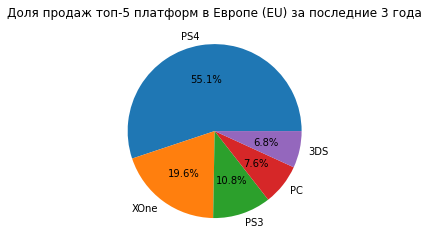

In [68]:
# строим диаграмму продаж топ-5 платформ в Европе (EU) за последние 3 года:
eu_sales.head().plot(y='eu_sales',kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж топ-5 платформ в Европе (EU) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [69]:
# формируем сводную таблицу продаж в Японии (JP) за последние 3 года:
jp_sales = period_data.pivot_table(index = 'platform',\
                                   values = 'jp_sales',\
                                   aggfunc = 'sum')\
                      .sort_values(by='jp_sales',\
                                   ascending=False)

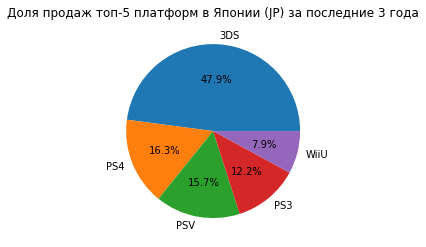

In [70]:
# строим диаграмму продаж топ-5 платформ в Японии (JP) за последние 3 года:
jp_sales.head().plot(y='jp_sales',kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж топ-5 платформ в Японии (JP) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

**Промежуточный вывод:**\
Исходя из диаграммы, за последние 3 года в Северной Америке самая популярная платформа PS4. Доля ее продаж составила 39,0%. Далее идут XOne и X360 с долями 32,1% и 11,2% соответственно.\
В Европе по продажам также лидирует PS4 с долей продаж 55,1%. На втором месте XOne с продажами 19,6%. На третьем месте PS3, где доля продаж составила 10,8%.
В Японии самые большие продажи у 3DS - 47,9%. Далее платформа PS4 с долей продаж 16,3%. На третьем месте PSV, доля продаж у которой составила 15,7%.

4.2 Определение для пользователя каждого региона (NA, EU, JP) самых популярных жанров (топ-5).

In [71]:
# формируем сводную таблицу продаж по жанрам в Северной Америке (NA)
# за последние 3 года:
na_genre = period_data.pivot_table(index = 'genre',\
                                   values= 'na_sales',\
                                   aggfunc = 'sum')\
                      .sort_values(by ='na_sales',\
                                   ascending = False)                                         

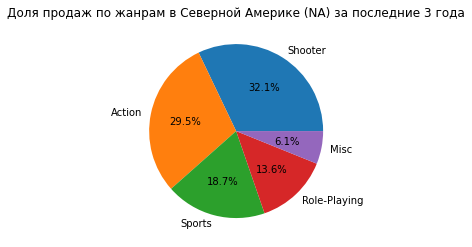

In [72]:
# строим диаграмму продаж топ-5 платформ по жанрам
# в Северной Америке (NA) за последние 3 года:
na_genre.head().plot(y='na_sales', kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж по жанрам в Северной Америке (NA) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [73]:
# формируем сводную таблицу продаж по жанрам в Европе (EU)
# за последние 3 года:
eu_genre = period_data.pivot_table(index = 'genre',\
                                   values= 'eu_sales',\
                                   aggfunc = 'sum')\
                      .sort_values(by ='eu_sales',\
                                   ascending = False)                                    

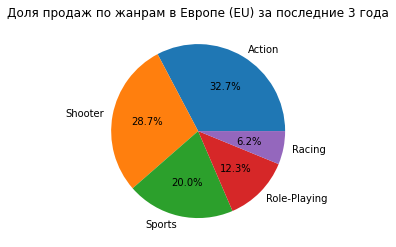

In [74]:
# строим диаграмму продаж топ-5 платформ по жанрам
# в Европе (EU) за последние 3 года:
eu_genre.head().plot(y='eu_sales', kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж по жанрам в Европе (EU) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [75]:
# формируем сводную таблицу продаж по жанрам в Японии (JP) за последние 3 года:
jp_genre = period_data.pivot_table(index = 'genre',\
                                   values= 'jp_sales',\
                                   aggfunc = 'sum')\
                      .sort_values(by ='jp_sales',\
                                   ascending = False)                                    

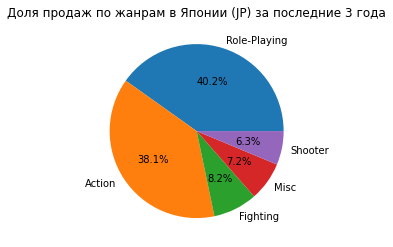

In [76]:
# строим диаграмму продаж топ-5 платформ по жанрам
# в Японии (JP) за последние 3 года:
jp_genre.head().plot(y='jp_sales', kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж по жанрам в Японии (JP) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

**Промежуточный вывод:**\
Исходя из диаграммы наибольшая доля продаж в Северной Америке за последние 3 года в жанре Shooter 32,1%. Далее идут продажи в жанре Action - 29,5%. На третьем месте жанр Sports с долей продаж 18,7%.\
В Европе лидирует жанр Action с долей продаж 32,7%. На втором месте продажи игр в жанре Shooter 28,7%, на третьем месте жанр Sports - 20,0%.\
Наибольшая доля продаж в Японии наблюдается в жанре Role-Playing. Здесь доля продаж составила 40,2%. Далее идет жанр Action с долей продаж 38,1%. На третьем месте продажи в жанре Fighting - 8,2%. 

4.3 Влияние рейтинга ESRB на продажи в каждом регионе (NA, EU, JP).

In [77]:
# формируем сводную таблицу продаж по рейтингу ESRB
# в Северной Америке (NA) за последние 3 года:
na_rating = period_data.pivot_table(index = 'rating',\
                                    values= 'na_sales',\
                                    aggfunc = 'sum')\
                       .sort_values(by ='na_sales',\
                                    ascending = False)   

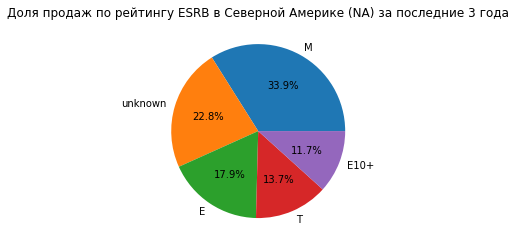

In [78]:
# строим диаграмму продаж:
na_rating.plot(y='na_sales', kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж по рейтингу ESRB в Северной Америке (NA) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [79]:
# формируем сводную таблицу продаж по рейтингу ESRB
# в Европе (EU) за последние 3 года:
eu_rating = period_data.pivot_table(index = 'rating',\
                                    values= 'eu_sales',\
                                    aggfunc = 'sum')\
                        .sort_values(by ='eu_sales',\
                                     ascending = False)

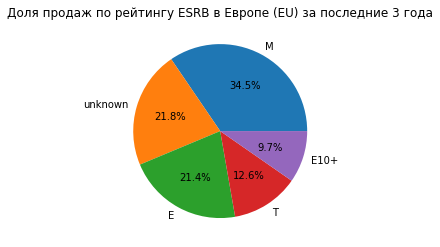

In [80]:
# строим диаграмму продаж:
eu_rating.plot(y='eu_sales', kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж по рейтингу ESRB в Европе (EU) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [81]:
# формируем сводную таблицу продаж по рейтингу ESRB
# в Японии (JP) за последние 3 года:
jp_rating = period_data.pivot_table(index = 'rating',\
                                    values= 'jp_sales',\
                                    aggfunc = 'sum')\
                        .sort_values(by ='jp_sales',\
                                     ascending = False)

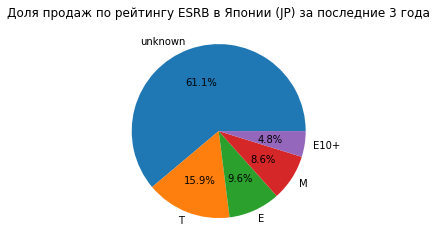

In [82]:
# строим диаграмму продаж:
jp_rating.plot(y='jp_sales', kind='pie', autopct = '%.1f%%')
plt.title('Доля продаж по рейтингу ESRB в Японии (JP) за последние 3 года')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

**Промежуточный вывод:**\
Наибольшую долю продаж в Северной Америке по рейтингу ESRB составляют игры с рейтингом М - 33,9%. На втором месте игры без рейтинга, доля их продаж составляет 22,8%. Далее идут игры с рейтингом Е - 17,9%.\
В Европе по рейтингу ESRB также наибольшая доля продаж игр с рейтингом М - 34,5%. Далее идут продажи игр без рейтинга - 21,8%. На третьем месте также игры с рейтингом Е и их доля составляет 21,4%.\
На первом месте по рейтингу ESRB в Японии игры без рейтинга и доля их продаж составляет 61,1%. Далее игры с рейтингом Т, доля их продаж - 15,9%. На третьем месте игры с рейтингом Е с долей продаж 9,6%.\
Таким образом, исходя из долей продаж, которые занимают игры без рейтинга, можно сделать вывод, что рейтинг ESRB не оказывает значительного влияния на объемы продаж игры.

**Вывод:**
1. Наибольшие суммарные продажи в регионе Северная Америка (NA) по платформам распределились следующим образом: PS4, XOne, X360, 3DS, PS3.\
Топ-5 продаж по платформам в Европе (EU) составили PS4, XOne, PS3, PC, 3DS по порядку.
В регионе Япония (JP) по продажам лидируют платформы 3DS, PS4, PSV, PS3, WiiU.\
Исходя из диаграммы, за последние 3 года в Северной Америке самая популярная платформа PS4. Доля ее продаж составила 39,0%. Далее идут XOne и X360 с долями 32,1% и 11,2% соответственно.\
В Европе по продажам также лидирует PS4 с долей продаж 55,1%. На втором месте XOne с продажами 19,6%. На третьем месте PS3, где доля продаж составила 10,8%.
В Японии самые большие продажи у 3DS - 47,9%. Далее платформа PS4 с долей продаж 16,3%. На третьем месте PSV, доля продаж у которой составила 15,7%.
2. Исходя из диаграммы наибольшая доля продаж в Северной Америке за последние 3 года в жанре Shooter 32,1%. Далее идут продажи в жанре Action - 29,5%. На третьем месте жанр Sports с долей продаж 18,7%.\
В Европе лидирует жанр Action с долей продаж 32,7%. На втором месте продажи игр в жанре Shooter 28,7%, на третьем месте жанр Sports - 20,0%.\
Наибольшая доля продаж в Японии наблюдается в жанре Role-Playing. Здесь доля продаж составила 40,2%. Далее идет жанр Action с долей продаж 38,1%. На третьем месте продажи в жанре Fighting - 8,2%. 
3. Наибольшую долю продаж в Северной Америке по рейтингу ESRB составляют игры с рейтингом М - 33,9%. На втором месте игры без рейтинга, доля их продаж составляет 22,8%. Далее идут игры с рейтингом Е - 17,9%.\
В Европе по рейтингу ESRB также наибольшая доля продаж игр с рейтингом М - 34,5%. Далее идут продажи игр без рейтинга - 21,8%. На третьем месте также игры с рейтингом Е и их доля составляет 21,4%.\
На первом месте по рейтингу ESRB в Японии игры без рейтинга и доля их продаж составляет 61,1%. Далее игры с рейтингом Т, доля их продаж - 15,9%. На третьем месте игры с рейтингом Е с долей продаж 9,6%.\
Таким образом, исходя из долей продаж, которые занимают игры без рейтинга, можно сделать вывод, что рейтинг ESRB не оказывает значительного влияния на объемы продаж игры.

#### Шаг 5. Проверьте гипотезы

5.1 Проверка гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Выдвигаем гипотезы:\
Н0 - Средний пользовательский рейтинг Xbox One равен среднему пользовательскому рейтингу платформы PC.\
Н1 - Средний пользовательский рейтинг Xbox One не равен среднему пользовательскому рейтингу платформы PC.

In [83]:
# проверяем гипотезы методом st.ttest_ind:
xone_user_score = period_data[(period_data['platform']== 'XOne') &\
                         (period_data['user_score']!=-1)]['user_score']
pc_user_score = period_data[(period_data['platform']=='PC')&\
                       (period_data['user_score']!=-1)]['user_score']

alpha = 0.01

results = st.ttest_ind(xone_user_score, pc_user_score)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод теста гипотезы:**\
Для проверки гипотезы применяем метод st.ttest_ind, так как это гипотеза о равенстве средних двух генеральных совокупностей.\
Это двустронняя гипотеза.\
Принимаем alpha = 0.01 для получения более точного результата.\
В результате проверки гипотезы p-value равно 10,5%, нулевую гипотезу не получилось отвергнуть.\
С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

5.2 Проверка гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Выдвигаем гипотезы:\
Н0 - Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.\
Н1 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

In [84]:
# проверяем гипотезы методом st.ttest_ind:
action_user_score = period_data[(period_data['genre']== 'Action') &\
                                (period_data['user_score']!=-1)]['user_score']
sports_user_score = period_data[(period_data['genre']=='Sports')&\
                           (period_data['user_score']!=-1)]['user_score']

alpha = 0.01

results = st.ttest_ind(action_user_score, sports_user_score)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод теста гипотезы:**\
Для проверки гипотезы применяем метод st.ttest_ind, так как это гипотеза о равенстве средних двух генеральных совокупностей.\
Это односторонняя гипотеза.\
Принимаем alpha = 0.01 для получения более точного результата.\
В результате проверки гипотезы, нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергаем.\
С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

**Вывод:**
1. Для проверки гипотезы применяем метод st.ttest_ind, так как это гипотеза о равенстве средних двух генеральных совокупностей.\
Принимаем alpha = 0.01 для получения более точного результата.\
В результате проверки гипотезы p-value равно 10,5%, нулевую гипотезу не получилось отвергнуть.\
С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
2. Для проверки гипотезы применяем метод st.ttest_ind, так как это гипотеза о равенстве средних двух генеральных совокупностей.\
Это односторонняя гипотеза.\
Принимаем alpha = 0.01 для получения более точного результата.\
В результате проверки гипотезы, нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергаем.\
С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

#### Шаг 6. Общий вывод

**1. Открытие файла с данными и изучение общей информации.**\
В датафрейме data 16 715 записей.\
В данных имеются следующие пропуски: 2 пропуска в столбце Name, 269 пропусков в столбце Year_of_Release, 8578 пропусков в столбце Critic_Score, 6701 пропусков в столбце User_Score, 6766 пропусков в столбце Rating.\
Названия столбцов являются некорректными, их необходимо будет привести к нижнему регистру.\
Типы данных в столбцах Year_of_Release, User_Score не соответствуют содержащимся в них данным. 

**2. Подготовка данных.**
- Привели названия столбцов к нижнему регистру.
- Заменили типы данных в следующих столбцах:
 * в столбце year_of_release привели значения к типу данных int, поскольку год выпуска отражается целым числом, предварительно удалив строки с пропущенными значениями;
 * в столбце user_score привели значения к типу данных float, поскольку оценки игр пользователей являются числовыми по аналогии с оценками критиков. tbd, встречающееся в столбце, означает — To Be Determined, т.е. "Будет определено", т.е. неизвестное значение, которое фактически является NaN. Заменяем NaN и tbd на 0 и меняем тип данных на число с плавающей точкой.
- Удаляем строки с пропущенными значениями в столбце name, поскольку без названия игры такие строки не несут никакой информации.\
Так получилось, что пропуски в столбце name совпали с пропусками в столбце genre и эти строки были удалены на предыдущем шаге.\
В столбцах critic_score и rating пропущенные значения заменяем на 0. Пропуски в данных могли возникнуть из-за ошибки при вводе данных или отсутствия необходимой информации.\
tbd в столбце с оценкой пользователей означает — To Be Determined, т.е. "Будет определено", т.е. неизвестное значение, которое фактически является NaN. В связи с этим при обработке можем заменить tbd на 0, по аналогии с NaN.
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.
- Явных дубликатов не обнаружено.\
Обнаружено 2 неявных дубликата. Строки, совпадающие по названию, платформе и году релиза одновременно удалены из датафрейма.

 **3. Проведение исследовательского анализа данных.**
- Наибольшее количество игр было выпущено в 2008 году - 1 427 игр.\
С 1991 по 2008 год количество выпускаемых игр ежегодно росло достаточно быстрыми темпами. Вероятнее всего, это связано с развитием компьютеров и растущей популярностью игровых приставок.\
Начиная с 2009 по 2016 годы наблюдаем на графике снижение выпуска игр. Этому способствовало развитие мобильных технологий. В то время пользователи стали отдавать свое предпочтение мобильным играм. \
Данные за 1980-1990 годы имеют небольшое значение и информативность, так как в эти годы было выпущено совсем немного игр.
- Исходя из графика, наибольшие суммарные продажи по платформам PS2, X360, PS3.
Для построения распределения по годам выбираем платформу с наибольшими суммарными продажами - PS2. 
Наибольшие суммарные продажи для платформы PS2 наблюдались в 2004 году, далее идет ежегодный резкий спад.
Просмотрев распределения по годам первых трех платформ, лидирующих по суммарным продажам, можно сделать вывод, что платформа набирает популярность примерно 5 лет, достигает своего пика и далее идет на спад 5-7 лет.
Таким образом, можно сделать вывод, что срок появления новых платформ и исчезновения старых - примерно за 5-7 лет.
- Учитывая высокую динамичность рынка, возьмем для исследования данные за последние 3 года.\
Формируем сводную таблицу продаж по платформам по годам.\
Исходя из графика, лидирует по продажам платформа PS4, за ней следуют платформы XOne и 3DS. с 2015 года по лидирующим платформам наблюдается спад продаж. Однако, продажи PS и XOne на порядок выше, чем у других, следовательно, их можно считать потенциально прибыльными.
- Исходя из диаграммы размаха, наибольшие продажи у платформ PS3 и PS4, самые низкие у DS. Видно, что есть выбросы, особенно на отрезке 1-4 млн.
- Для просмотра влияния на продажи отзывов пользователей и критиков выбираем платформу с наибольшими суммарными продажами - PS4. \
Изучив соотношение отзывов покупателей и критиков можно сделать вывод, что большую часть составляют высокие оценки.\
Корреляция между отзывами пользователей и продажами слабая - 0.11311562450852881.\
Корреляция между отзывами критиков и продажами слабая - 0.22754960627752652.\
Исходя из расчета корреляции между отзывами пользователей и суммарными продажами по топ-7 платформам наблюдается сильная связь по платформе Wii, умеренная связь по платформе WiiU и слабая связь по остальным платформам (PS4, XOne, X360, PS3, 3DS).\
Между отзывами критиков и суммарными продажами наблюдается умеренная связь практически по всем платформам (PS4, XOne, WiiU, X360, PS3, 3DS), за исключением платформы Wii. Вероятнее всего, значение NaN при расчете корреляции возникло из-за отсутствия данных.\
Такие показатели могут говорить о том, что покупатели приобретают игры не полагаясь на отзывы пользователей, однако обращают внимание на отзывы критиков.
- На фоне всех игр выделяется жанр Shooter с самым высоким медианным значением продаж, которое составляет 0,52 млн. проданных копий. Меньше всего продаж в жанре Adventure - 0.03 млн. проданных копий.

 **4. Составление портрета пользователя каждого региона.**
- Наибольшие суммарные продажи в регионе Северная Америка (NA) по платформам распределились следующим образом: PS4, XOne, X360, 3DS, PS3.\
Топ-5 продаж по платформам в Европе (EU) составили PS4, XOne, PS3, PC, 3DS по порядку.
В регионе Япония (JP) по продажам лидируют платформы 3DS, PS4, PSV, PS3, WiiU.\
Исходя из диаграммы, за последние 3 года в Северной Америке самая популярная платформа PS4. Доля ее продаж составила 39,0%. Далее идут XOne и X360 с долями 32,1% и 11,2% соответственно.\
В Европе по продажам также лидирует PS4 с долей продаж 55,1%. На втором месте XOne с продажами 19,6%. На третьем месте PS3, где доля продаж составила 10,8%.
В Японии самые большие продажи у 3DS - 47,9%. Далее платформа PS4 с долей продаж 16,3%. На третьем месте PSV, доля продаж у которой составила 15,7%.
- Исходя из диаграммы наибольшая доля продаж в Северной Америке за последние 3 года в жанре Shooter 32,1%. Далее идут продажи в жанре Action - 29,5%. На третьем месте жанр Sports с долей продаж 18,7%.\
В Европе лидирует жанр Action с долей продаж 32,7%. На втором месте продажи игр в жанре Shooter 28,7%, на третьем месте жанр Sports - 20,0%.\
Наибольшая доля продаж в Японии наблюдается в жанре Role-Playing. Здесь доля продаж составила 40,2%. Далее идет жанр Action с долей продаж 38,1%. На третьем месте продажи в жанре Fighting - 8,2%. 
- Наибольшую долю продаж в Северной Америке по рейтингу ESRB составляют игры с рейтингом М - 33,9%. На втором месте игры без рейтинга, доля их продаж составляет 22,8%. Далее идут игры с рейтингом Е - 17,9%.\
В Европе по рейтингу ESRB также наибольшая доля продаж игр с рейтингом М - 34,5%. Далее идут продажи игр без рейтинга - 21,8%. На третьем месте также игры с рейтингом Е и их доля составляет 21,4%.\
На первом месте по рейтингу ESRB в Японии игры без рейтинга и доля их продаж составляет 61,1%. Далее игры с рейтингом Т, доля их продаж - 15,9%. На третьем месте игры с рейтингом Е с долей продаж 9,6%.\
Таким образом, исходя из долей продаж, которые занимают игры без рейтинга, можно сделать вывод, что рейтинг ESRB не оказывает значительного влияния на объемы продаж игры.

 **5. Проверка гипотезы.**
- Для проверки гипотезы применяем метод st.ttest_ind, так как это гипотеза о равенстве средних двух генеральных совокупностей.\
Принимаем alpha = 0.01 для получения более точного результата.\
В результате проверки гипотезы p-value равно 10,5%, нулевую гипотезу не получилось отвергнуть.\
С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
- Для проверки гипотезы применяем метод st.ttest_ind, так как это гипотеза о равенстве средних двух генеральных совокупностей.\
Это односторонняя гипотеза.\
Принимаем alpha = 0.01 для получения более точного результата.\
В результате проверки гипотезы, нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергаем.\
С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

**Рекомендации отделу маркетинга:**
Для проведения рекламной кампании в 2017 году рекомендуется обратить внимание на такие платформы, как PS4, XOne, 3DS.\
Жанры игр, заслуживающие внимания: Shooter, Action, Sports и Role-Playing.\
Следует обратить внимание на популярность за последние 3 года игр с возрастным ограничением от 17 лет (рейтинг М по ESRB), а также игр без возрастного ограничения (рейтинг E по ESRB).\
Оценки пользователей можно не учитывать, поскольку большинство пользователей не ставит оценки. Оценки критиков рекомендуется учитывать.